# 4.9 TASK - Part 2

### Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\09-2025 Instacart Basket Analysis'

In [3]:
ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

### Create a Bar Chart

<Axes: xlabel='orders_day_of_week'>

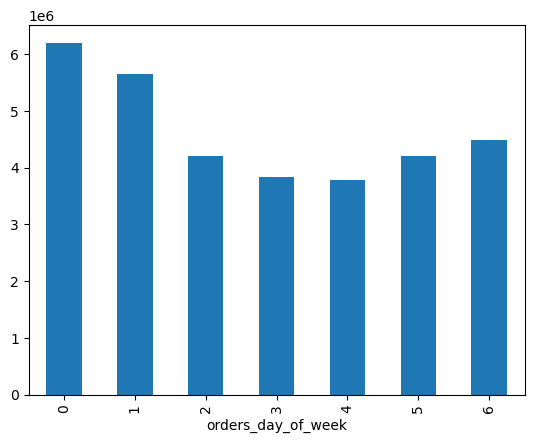

In [5]:
ords_prods_cust_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

### Create a Histogram

<Axes: ylabel='Frequency'>

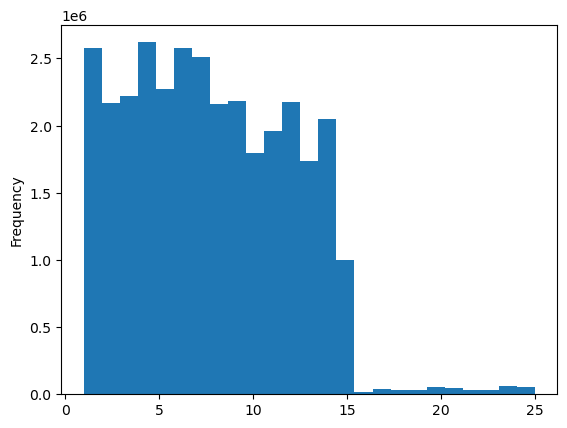

In [6]:
ords_prods_cust_merged['prices'].plot.hist(bins = 25)

### Create a Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

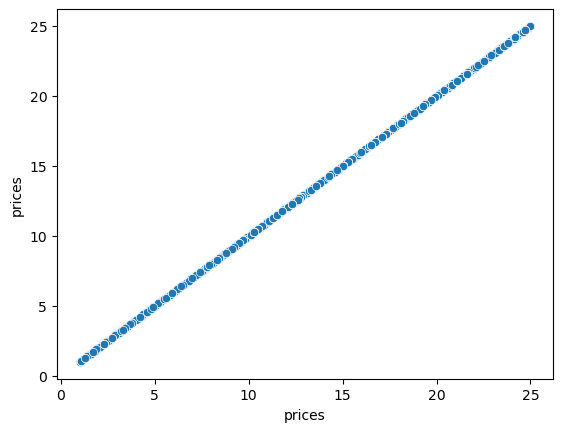

In [7]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust_merged)

### Create a Line Chart with a Data Sample

#### Data Sampling

In [8]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merged)) <= 0.7

In [11]:
big = ords_prods_cust_merged[dev] # storing 70% of the dataframe

In [12]:
small = ords_prods_cust_merged[~dev] # storig 30% of the dataframe

In [13]:
len(ords_prods_cust_merged)

32404859

In [14]:
len(big) + len(small)

32404859

In [15]:
df_2_merged = small[['orders_day_of_week','prices']]

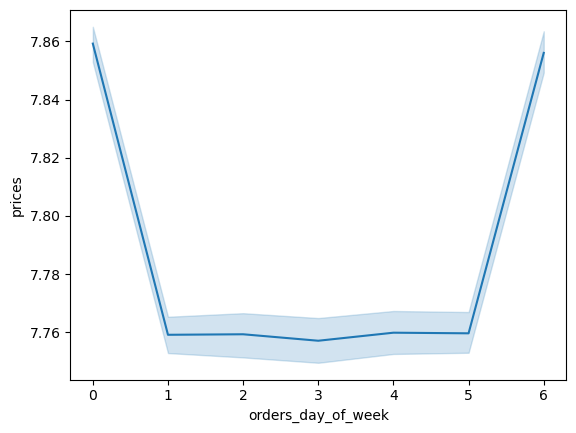

In [16]:
line = sns.lineplot(data = df_2_merged, x = 'orders_day_of_week',y = 'prices')

### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
#### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

<Axes: ylabel='Frequency'>

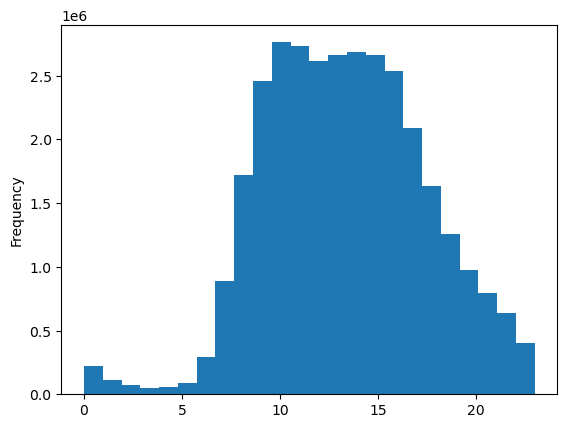

In [19]:
ords_prods_cust_merged['order_hour_of_day'].astype(int).plot.hist(bins=24)

<Axes: ylabel='Frequency'>

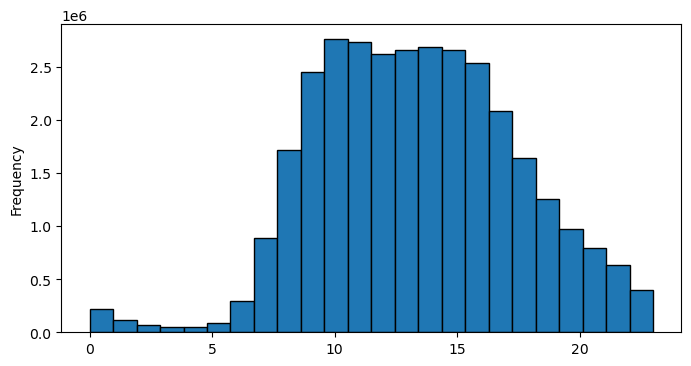

In [20]:
ords_prods_cust_merged['order_hour_of_day'].astype(int).plot.hist(bins=24, edgecolor='black', figsize=(8,4))

##### The histogram of order_hour_of_day shows that most orders occur between 10 AM and 4 PM, with peaks in late morning and early afternoon. Early morning and late evening orders are much lower. I made the plot more visually appealing by adjusting bins and adding edge colors for clarity. This helps stakeholders quickly see peak ordering times.

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

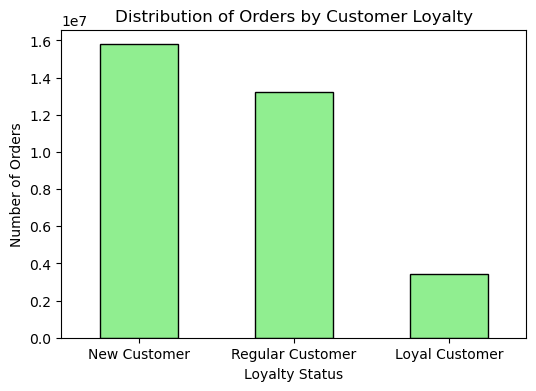

In [22]:
ords_prods_cust_merged['loyalty_flag'].value_counts().plot.bar(figsize=(6,4), color='lightgreen',edgecolor='black')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Customer Loyalty')
plt.xticks(rotation=0)  # keeps labels horizontal
plt.show()

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [29]:
df_2 = small[['order_hour_of_day', 'prices']]

In [30]:
avg_price_by_hour = df_2.groupby('order_hour_of_day')['prices'].mean()

C:\Users\ophab\AppData\Local\Temp\ipykernel_7860\764751906.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_hour = df_2.groupby('order_hour_of_day')['prices'].mean()


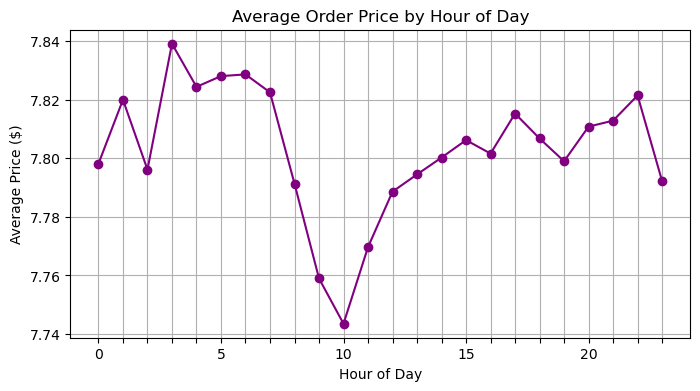

In [31]:
plt.figure(figsize=(8,4))
avg_price_by_hour.plot.line(marker='o', color='purple')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price ($)')
plt.title('Average Order Price by Hour of Day')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

##### The line chart shows how average order prices vary by hour of the day. From the sample, we can observe whether customers tend to spend more during certain hours. This insight helps stakeholders understand peak spending times and could inform marketing or staffing strategies.

### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
#### In a markdown cell beneath your line chart, describe what the line chart shows.

In [35]:
ords_prods_cust_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'busiest_day', 'day_category',
       'busiest_period_of_day', 'loyalty_flag', 'max_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [36]:
# Grouping by age and calculating average number of dependents
age_dependents = ords_prods_cust_merged.groupby('age')['n_dependants'].mean()

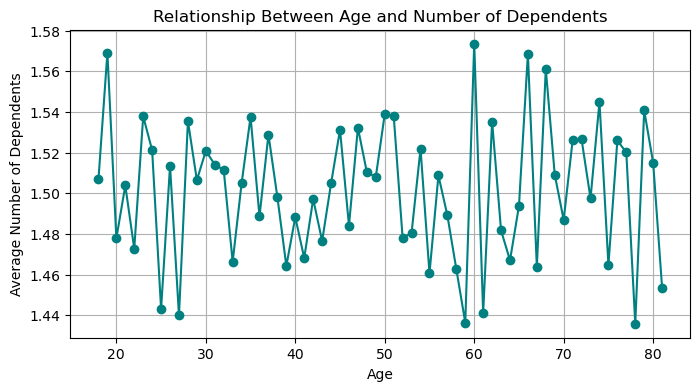

In [37]:
# Plot line chart
plt.figure(figsize=(8,4))
age_dependents.plot.line(marker='o', color='teal')

plt.xlabel('Age')
plt.ylabel('Average Number of Dependents')
plt.title('Relationship Between Age and Number of Dependents')
plt.grid(True)
plt.show()

##### The line chart shows how the average number of dependents changes with age. Most customers follow a typical pattern where dependents increase during child-rearing ages and decline as children grow older. Interestingly, there are spikes around age 20 and ages 60–70, which could indicate younger customers starting families early or older customers with multi-generational households. This insight helps marketing teams target campaigns more precisely based on age and family structure.

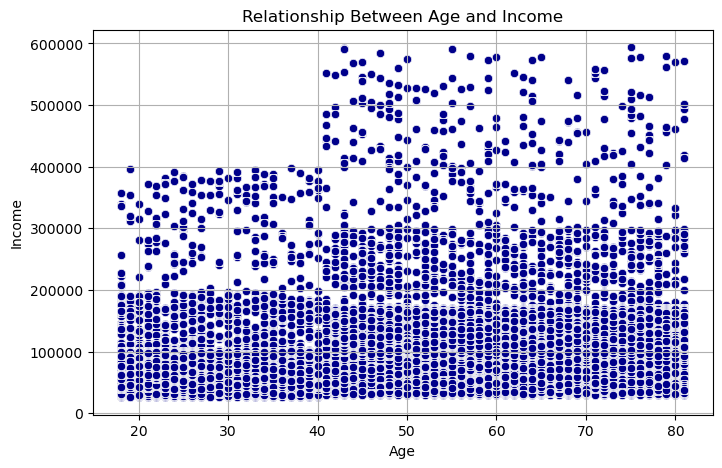

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=ords_prods_cust_merged, x='age', y='income', color='darkblue')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Relationship Between Age and Income')
plt.grid(True)
plt.show()

##### The scatterplot displays the relationship between age and income for customers. Most customers show a moderate increase in income with age, but there are several outliers between ages 40 and 80 with notably high incomes. These high-income customers could represent a segment with greater spending power, which may be valuable for targeted marketing campaigns.

In [40]:
save_path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\09-2025 Instacart Basket Analysis\04 Analysis\Visualizations'

In [44]:
#Orders by Day of Week
ords_prods_cust_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.gcf().savefig(os.path.join(save_path, 'bar_orders_day_of_week.png'))
plt.close()

In [45]:
#Prices Histogram
ords_prods_cust_merged['prices'].plot.hist(bins=25)
plt.gcf().savefig(os.path.join(save_path, 'hist_prices.png'))
plt.close()

In [46]:
#Prices Scatterplot
sns.scatterplot(x='prices', y='prices', data=ords_prods_cust_merged)
plt.gcf().savefig(os.path.join(save_path, 'scatter_prices.png'))
plt.close()

In [48]:
#Lineplot: Orders Day of Week vs Prices
sns.lineplot(data=df_2_merged, x='orders_day_of_week', y='prices')
plt.gcf().savefig(os.path.join(save_path, 'line_orders_day_vs_prices.png'))
plt.close()

### Exporting Visualizations

In [54]:
#Orders by Day of Week
bar2 = ords_prods_cust_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()
bar2.figure.savefig(os.path.join(save_path, 'bar_orders_day_of_week.png'))
plt.close()

In [55]:
#Prices Histogram
hist2 = ords_prods_cust_merged['prices'].plot.hist(bins=25)
hist2.figure.savefig(os.path.join(save_path, 'hist_prices.png'))
plt.close()

In [56]:
#Prices Scatterplot
scatter2 = sns.scatterplot(x='prices', y='prices', data=ords_prods_cust_merged)
scatter2.figure.savefig(os.path.join(save_path, 'scatter_prices.png'))
plt.close()

In [57]:
#Lineplot: Orders Day of Week vs Prices
line3 = sns.lineplot(data=df_2_merged, x='orders_day_of_week', y='prices')
line3.figure.savefig(os.path.join(save_path, 'line_orders_day_vs_prices.png'))
plt.close()

In [63]:
#Orders by Hour
hist = ords_prods_cust_merged['order_hour_of_day'].astype(int).plot.hist(bins=24, edgecolor='black')
hist.figure.savefig(os.path.join(save_path, 'hist_orders_by_hour.png'))
plt.close()

In [59]:
#Loyalty Flag
bar = ords_prods_cust_merged['loyalty_flag'].value_counts().plot.bar()
bar.figure.savefig(os.path.join(save_path, 'bar_loyalty_flag.png'))
plt.close()

In [65]:
#Average Price by Hour
line = df_2.groupby('order_hour_of_day')['prices'].mean().plot.line()
line.figure.savefig(os.path.join(save_path, 'line_avg_price_by_hour.png'))
plt.close()

C:\Users\ophab\AppData\Local\Temp\ipykernel_7860\1390099235.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  line = df_2.groupby('order_hour_of_day')['prices'].mean().plot.line()


In [61]:
#Age vs Average Dependents
line2 = ords_prods_cust_merged.groupby('age')['n_dependants'].mean().plot.line()
line2.figure.savefig(os.path.join(save_path, 'line_age_dependents.png'))
plt.close()

In [62]:
#Age vs Income Scatterplot
scatter = sns.scatterplot(x='age', y='income', data=ords_prods_cust_merged)
scatter.figure.savefig(os.path.join(save_path, 'scatter_age_income.png'))
plt.close()

##### In this project, I created a series of visualizations to explore the merged Instacart dataset and provide descriptive insights for stakeholders. Initially, I generated histograms, bar charts, line plots, and scatterplots using Pandas and Seaborn. While the first three visuals were automatically generated and left as they were, I found them not very visually appealing, so for the subsequent visualizations, I researched best practices for styling charts and applied colors, edges, and bin sizes to make them more readable and informative. I also explored the differences between using plt functions directly versus plotting through Pandas objects and saving figures via figure.savefig(). This approach allowed me to save each visualization individually while keeping the notebook clean using plt.close(). Decisions were made regarding the choice of bins for histograms (e.g., 24 bins for order_hour_of_day), ordering for bar charts, and ensuring that categorical axes were clear. Overall, the process involved iterative improvements, research-backed styling, and thoughtful choices about which plot types and formats best communicate the insights in the dataset.